In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

In [77]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')
y = df['Milk']
df

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


In [78]:
y_train = y.iloc[:-12]
y_test = y.iloc[-12:]

### 1 Lag AutoRegression

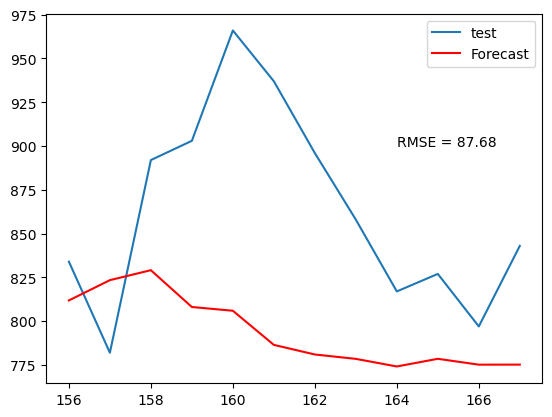

In [80]:
lag_p = 6
model = ARIMA(y_train,order=(lag_p,0,0))
model_fit = model.fit()
predictions = model_fit.predict(start = len(y_train), end=len(y_train)+len(y_test)-1,dynamic=False)
y_test.plot(label='test')
predictions.plot(color='red',label='Forecast')
rmse = np.sqrt(mse(y_test,predictions))
plt.text(164,900,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

# Moving Average Model 

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


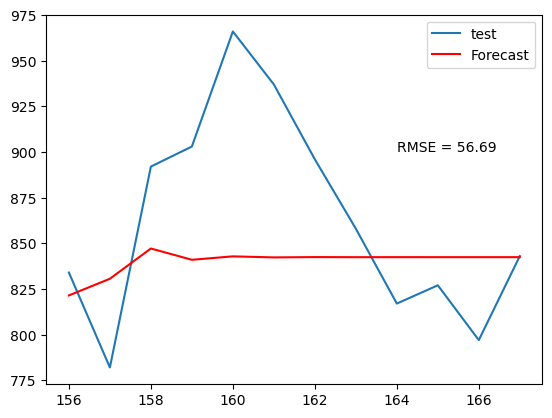

In [82]:
lag_p ,diff ,lag_q =1,1,4
model = ARIMA(y_train , order=(lag_p,diff,lag_q))
model_fit = model.fit()
predictions = model_fit.predict(start = len(y_train), end=len(y_train)+len(y_test)-1,dynamic=False)
y_test.plot(label='test')
predictions.plot(color='red',label='Forecast')
rmse = np.sqrt(mse(y_test,predictions))
plt.text(164,900,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()


In [83]:
! pip install pmdarima

In [84]:
from pmdarima.arima import auto_arima

## How to get best model For ARIMA

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1593.689, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1624.299, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1626.095, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1626.164, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1622.458, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1604.395, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1618.644, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1572.405, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1561.805, Time=0.28 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 s

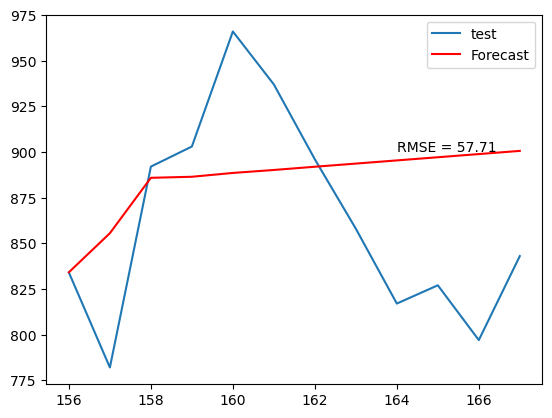

In [107]:

model_ = auto_arima(y_train , trace=True , error_action='ignore', suppress_warnings=True)
forecast = model_.predict(n_periods = len(y_test))
y_test.plot(label='test')
forecast.plot(color='red',label='Forecast')
rmse = np.sqrt(mse(y_test,forecast))
plt.text(164,900,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()


# SARIMA

In [88]:
model_ = auto_arima(y_train , trace=True , error_action='ignore', suppress_warnings=True , seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1000.136, Time=0.52 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1218.095, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1015.855, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1104.312, Time=0.13 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1349.320, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=998.169, Time=0.38 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1038.230, Time=0.13 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1000.125, Time=0.77 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1012.395, Time=0.34 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=996.457, Time=0.23 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1036.989, Time=0.07 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=998.423, Time=0.30 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=998.411, Time=0.48 sec
 ARIMA(1,0,2)(1,1,0)[12] int

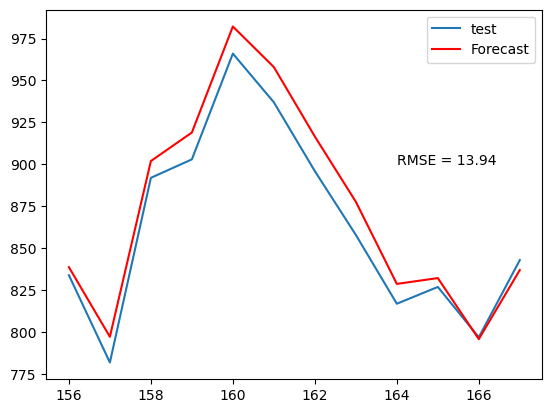

In [105]:

forecast = model_.predict(n_periods = len(y_test))
y_test.plot(label='test')
forecast.plot(color='red',label='Forecast')
rmse = np.sqrt(mse(y_test,forecast))
plt.text(164,900,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()